# Greek Parliament Proceedings (Α.Μ 8170135)

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import re
from collections import defaultdict
%matplotlib inline
matplotlib.style.use('ggplot')
pd.set_option("display.max_columns", None)

## Data Selection and Preparation

## To start let's import our dataset

In [2]:
greek_par0 = pd.read_csv('Greek_Parliament_Proceedings_1989_2019.csv.zip')

In [3]:
greek_par0

,member_name,sitting_date,parliamentary_period,parliamentary_session,parliamentary_sitting,political_party,speaker_info,speech
0,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...
1,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...
2,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,"Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ..."
3,NaN,1989-07-03,period 5,session 1,sitting 1,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
4,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...
...,...,...,...,...,...,...,...,...
1194402,συντυχακης δανιηλ εμμανουηλ,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,κομμουνιστικο κομμα ελλαδας,NaN,"Κύριε Πρόεδρε, οι καταστροφές προφανώς δεν ήτ..."
1194403,κακλαμανης μιχαηλ νικητας,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,νεα δημοκρατια,προεδρευων,"Ορίστε, κύριε Υπουργέ, έχετε τον λόγο."
1194404,κακλαμανης μιχαηλ νικητας,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,νεα δημοκρατια,προεδρευων,"Αρκεί και το κεντρικό κράτος, κύριε Υπουργέ, ..."
1194405,NaN,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."


## And continue with cleansing, starting by dropping rows that lack the informations we need

In [4]:
greek_par = greek_par0.dropna(subset=['member_name', 'political_party','speech'])
greek_par = greek_par.reset_index(drop=True)
greek_par

,member_name,sitting_date,parliamentary_period,parliamentary_session,parliamentary_sitting,political_party,speaker_info,speech
0,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...
1,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...
2,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,"Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ..."
3,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...
4,κρητικος νικολαου παναγιωτης,1989-07-04,period 5,session 1,sitting 2,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,"Υπάρχει κανείς εκ των κυρίων συναδέλφων, ο οπ..."
...,...,...,...,...,...,...,...,...
1147065,κακλαμανης μιχαηλ νικητας,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,νεα δημοκρατια,προεδρευων,Τα υπόλοιπα στη δευτερολογία σας.Κύριε Συντυχ...
1147066,συντυχακης δανιηλ εμμανουηλ,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,κομμουνιστικο κομμα ελλαδας,NaN,"Κύριε Πρόεδρε, οι καταστροφές προφανώς δεν ήτ..."
1147067,κακλαμανης μιχαηλ νικητας,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,νεα δημοκρατια,προεδρευων,"Ορίστε, κύριε Υπουργέ, έχετε τον λόγο."
1147068,κακλαμανης μιχαηλ νικητας,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,νεα δημοκρατια,προεδρευων,"Αρκεί και το κεντρικό κράτος, κύριε Υπουργέ, ..."


### Continuing I'm going to keep speeches from the last 15 years in order to have affordable runtimes later on, and I'm dropping parties that have significantlly less speeches than others in order to have a more ballanced dataset

In [5]:
greek_par['sitting_date'] = pd.to_datetime(greek_par['sitting_date'])

In [6]:
greek_par = greek_par.loc[greek_par['sitting_date'].dt.year >= 2005]

In [7]:
greek_par = greek_par.reset_index(drop=True)
greek_par

,member_name,sitting_date,parliamentary_period,parliamentary_session,parliamentary_sitting,political_party,speaker_info,speech
0,πιπεργιας παντελη δημητριος,2005-01-10,period 11 presided parliamentary republic,session 1 continuation of plenary session,sitting 90,πανελληνιο σοσιαλιστικο κινημα,NaN,"Κυρίες και κύριοι συνάδελφοι, ένα γνωμικό ανα..."
1,σουρλας ιωαννη γεωργιος,2005-01-10,period 11 presided parliamentary republic,session 1 continuation of plenary session,sitting 90,νεα δημοκρατια,προεδρευων,Θα πάρετε χρόνο δύο λεπτών από τη δευτερολογί...
2,πιπεργιας παντελη δημητριος,2005-01-10,period 11 presided parliamentary republic,session 1 continuation of plenary session,sitting 90,πανελληνιο σοσιαλιστικο κινημα,NaN,"Μάλιστα, κύριε Πρόεδρε. Δεν θα παραλείψουμε ν..."
3,σουρλας ιωαννη γεωργιος,2005-01-10,period 11 presided parliamentary republic,session 1 continuation of plenary session,sitting 90,νεα δημοκρατια,προεδρευων,"Για να μην υπάρχει διακοπή, όταν αγορεύετε γι..."
4,τσοχατζοπουλος ευαγγελου αποστολος-αθανασιος,2005-01-10,period 11 presided parliamentary republic,session 1 continuation of plenary session,sitting 90,πανελληνιο σοσιαλιστικο κινημα,NaN,"Κύριε Πρόεδρε, κυρίες και κύριοι συνάδελφοι, ..."
...,...,...,...,...,...,...,...,...
647421,κακλαμανης μιχαηλ νικητας,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,νεα δημοκρατια,προεδρευων,Τα υπόλοιπα στη δευτερολογία σας.Κύριε Συντυχ...
647422,συντυχακης δανιηλ εμμανουηλ,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,κομμουνιστικο κομμα ελλαδας,NaN,"Κύριε Πρόεδρε, οι καταστροφές προφανώς δεν ήτ..."
647423,κακλαμανης μιχαηλ νικητας,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,νεα δημοκρατια,προεδρευων,"Ορίστε, κύριε Υπουργέ, έχετε τον λόγο."
647424,κακλαμανης μιχαηλ νικητας,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,νεα δημοκρατια,προεδρευων,"Αρκεί και το κεντρικό κράτος, κύριε Υπουργέ, ..."


In [8]:
greek_par.groupby(by='political_party').count()

,member_name,sitting_date,parliamentary_period,parliamentary_session,parliamentary_sitting,speaker_info,speech
political_party,,,,,,,
ανεξαρτητοι (εκτος κομματος),25960,25960,25960,25960,25960,8231,25960
ανεξαρτητοι δημοκρατικοι βουλευτες,1769,1769,1769,1769,1769,275,1769
ανεξαρτητοι ελληνες - πανος καμμενος,13785,13785,13785,13785,13785,8855,13785
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια,5521,5521,5521,5521,5521,2317,5521
δημοκρατικη αριστερα,4204,4204,4204,4204,4204,43,4204
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα),22991,22991,22991,22991,22991,8055,22991
ενωση κεντρωων,9888,9888,9888,9888,9888,4811,9888
κομμουνιστικο κομμα ελλαδας,57348,57348,57348,57348,57348,18698,57348
λαικη ενοτητα,346,346,346,346,346,9,346


In [9]:
greek_par=greek_par.loc[(greek_par['political_party'] != 'ανεξαρτητοι δημοκρατικοι βουλευτες' ) & (greek_par['political_party'] != 'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια' ) & (greek_par['political_party'] != 'δημοκρατικη αριστερα' ) & (greek_par['political_party'] != 'λαικη ενοτητα') & (greek_par['political_party'] != 'το ποταμι')]

In [10]:
greek_par.shape

(627914, 8)

#### (Giving a more convinient name to this party)

In [11]:
com_mapping = {'δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)': 'δημοκρατική συμπαράταξη'}
f = lambda x: com_mapping.get(x, x) 
greek_par.loc[:, 'political_party'] = greek_par.loc[:, 'political_party'].map(f)

C:\Python\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


### That's all about cleansing (for now, obviously) so let's start exploring the dataset

### Here we have a dataframe with everything that anyone said in a day

In [11]:
said_per_day = greek_par.groupby(['political_party','member_name','sitting_date'])['speech'].apply(lambda x: ','.join(x)).reset_index()
said_per_day

,political_party,member_name,sitting_date,speech
0,ανεξαρτητοι (εκτος κομματος),αγατσα αριστειδη αριαδνη,2009-12-01,"Κυρίες και κύριοι συνάδελφοι, κυρία Πρόεδρε, ..."
1,ανεξαρτητοι (εκτος κομματος),αγατσα αριστειδη αριαδνη,2009-12-22,"Κύριε Πρόεδρε, κυρίες και κύριοι συνάδελφοι, ..."
2,ανεξαρτητοι (εκτος κομματος),αηδονης ευαγγελου χρηστος,2012-01-19,"Κυρίες και κύριοι συνάδελφοι, βρισκόμαστε σε ..."
3,ανεξαρτητοι (εκτος κομματος),αηδονης ευαγγελου χρηστος,2012-02-15,"Υπογράμμιζε., Δεν λέω για εσάς, κύριε Ιωαννίδ..."
4,ανεξαρτητοι (εκτος κομματος),αηδονης ευαγγελου χρηστος,2012-02-16,"Ευχαριστώ, κύριε Πρόεδρε.Κύριε Υπουργέ, στο Κ..."
...,...,...,...,...
72677,συνασπισμος ριζοσπαστικης αριστερας,ψυχογιος κωνσταντινου γεωργιος,2018-12-14,"Ευχαριστώ πολύ, κύριε Πρόεδρε.Θα ξεκινήσω την..."
72678,συνασπισμος ριζοσπαστικης αριστερας,ψυχογιος κωνσταντινου γεωργιος,2018-12-20,"Σας ευχαριστώ πολύ, κύριε Πρόεδρε. Θα δείξετε..."
72679,συνασπισμος ριζοσπαστικης αριστερας,ψυχογιος κωνσταντινου γεωργιος,2018-12-21,"Ευχαριστώ πολύ, κύριε Πρόεδρε.Μια μικρή ανοχή..."
72680,συνασπισμος ριζοσπαστικης αριστερας,ψυχογιος κωνσταντινου γεωργιος,2019-01-24,"Ευχαριστώ πολύ, κύριε Πρόεδρε. Νομίζω ότι μπα..."


### Now let's find how many speeches there are per party

In [12]:
c_sp_par = greek_par.groupby(['political_party'])['speech'].count().sort_values().reset_index()
c_sp_par.columns = ['party','speeches']
c_sp_par

,party,speeches
0,ενωση κεντρωων,9888
1,ανεξαρτητοι ελληνες - πανος καμμενος,13785
2,λαικος συνδεσος - χρυση αυγη,14172
3,δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστι...,22991
4,λαικος ορθοδοξος συναγερμος,23197
5,ανεξαρτητοι (εκτος κομματος),25960
6,κομμουνιστικο κομμα ελλαδας,57348
7,πανελληνιο σοσιαλιστικο κινημα,122953
8,συνασπισμος ριζοσπαστικης αριστερας,126261
9,νεα δημοκρατια,211359


Text(0.5, 0, 'SPEECHES PER PARTY')

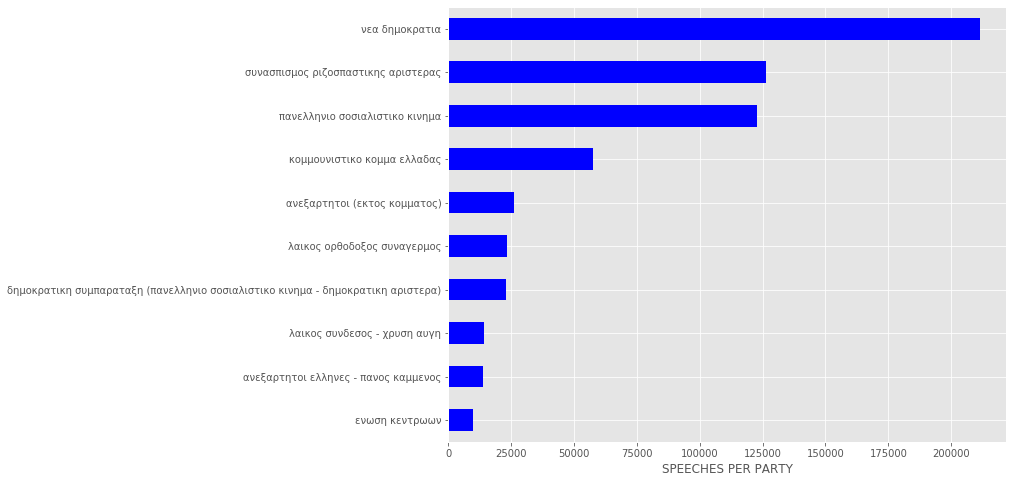

In [13]:
pos = np.arange(len(c_sp_par['party']))
c_s_p = c_sp_par['speeches'] 
c_s_p.plot.barh(figsize=(10,8),color='b')
plt.yticks(pos,c_sp_par['party'])
plt.xlabel('SPEECHES PER PARTY')

### As it was expected "Nea Dimokratia", have the most speeches, after being the partie that's at least second in our country in the last 15 years. "SYRIZA" and "PASOK" are following and being very close to each other

### Lets find now how many speakers there are per party

In [14]:
speaker_party = greek_par[['political_party','member_name']]
speaker_party = speaker_party.drop_duplicates().reset_index(drop=True)
speaker_party

,political_party,member_name
0,πανελληνιο σοσιαλιστικο κινημα,πιπεργιας παντελη δημητριος
1,νεα δημοκρατια,σουρλας ιωαννη γεωργιος
2,πανελληνιο σοσιαλιστικο κινημα,τσοχατζοπουλος ευαγγελου αποστολος-αθανασιος
3,πανελληνιο σοσιαλιστικο κινημα,λωτιδης κυριακου λαζαρος
4,πανελληνιο σοσιαλιστικο κινημα,ρηγας θεοφανη παναγιωτης
...,...,...
952,νεα δημοκρατια,κατσιαντωνης νικολαου γεωργιος
953,συνασπισμος ριζοσπαστικης αριστερας,κωστοπαναγιωτου κωνσταντινου ηλιας
954,ανεξαρτητοι (εκτος κομματος),μεγαλοοικονομου πασχαλη θεοδωρα
955,ανεξαρτητοι (εκτος κομματος),καμμενος κωνσταντινου δημητριος


In [15]:
speaker_per_party = speaker_party.groupby('political_party').count().sort_values(by='member_name')
speaker_per_party

,member_name
political_party,
ενωση κεντρωων,9
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα),19
λαικος ορθοδοξος συναγερμος,19
ανεξαρτητοι ελληνες - πανος καμμενος,22
λαικος συνδεσος - χρυση αυγη,26
κομμουνιστικο κομμα ελλαδας,44
ανεξαρτητοι (εκτος κομματος),106
συνασπισμος ριζοσπαστικης αριστερας,212
πανελληνιο σοσιαλιστικο κινημα,219


Text(0.5, 0, 'SPEAKERS PER PARTY')

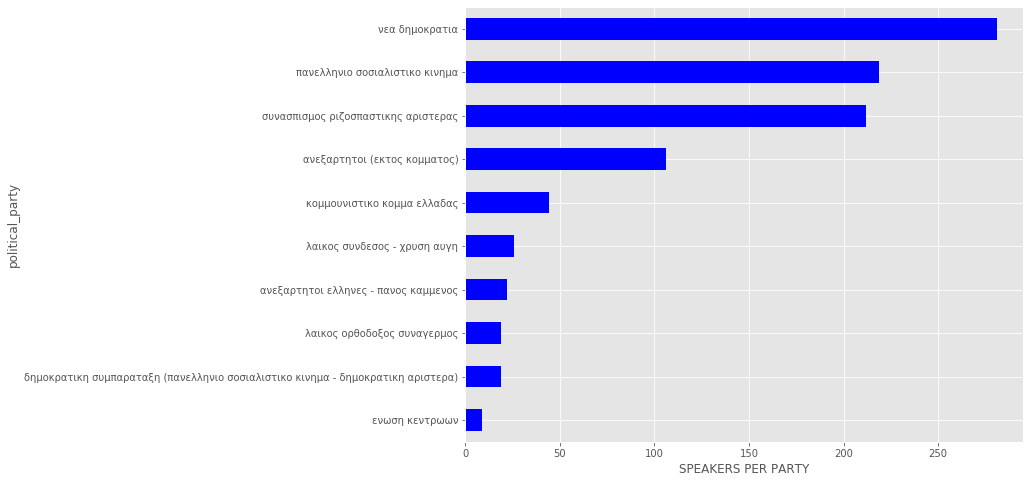

In [16]:
pos = np.arange(len(speaker_per_party.index))
sp_p = speaker_per_party['member_name'] 
sp_p.plot.barh(figsize=(10,8),color='b')
plt.yticks(pos)
plt.xlabel('SPEAKERS PER PARTY')

### Once again "Nea Dimokratia","PASOK" and "SYRIZA"are intervals

### We continue with speeches over time

In [17]:
s_time = greek_par.groupby('sitting_date')['speech'].count()
s_time = pd.DataFrame(data=s_time)
s_time

,speech
sitting_date,
2005-01-10,65
2005-01-11,128
2005-01-12,91
2005-01-13,160
2005-01-14,308
...,...
2019-02-18,3
2019-02-19,208
2019-02-20,236


In [18]:
month = pd.DatetimeIndex(s_time.index).to_period("M")

In [19]:
s_time = s_time.groupby(month).sum()
s_time

,speech
sitting_date,
2005-01,3424
2005-02,4289
2005-03,4167
2005-04,3162
2005-05,3563
...,...
2018-10,1720
2018-11,2277
2018-12,3636


Text(0.5, 1.0, 'SPEECHES OVER TIME')

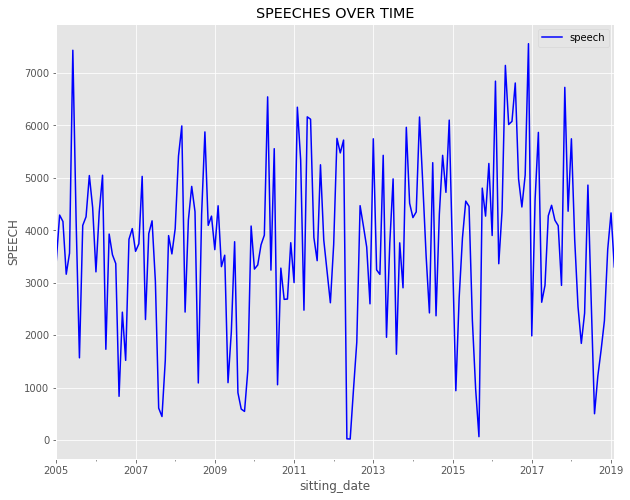

In [20]:
s_time.plot(y = 'speech',figsize=(10,8),style='b')
plt.ylabel('SPEECH')
plt.title('SPEECHES OVER TIME')

### As you can see the number of speeches per month changes intensively from year to year. However the volume of pulsation remains quite similar over the years. That could be due some perodical events that effect the number of speeches, such as elections, changing laws etc.

### Lets see now how the number of speeches defer along years for every political party

In [21]:
s_time_party = greek_par.groupby([greek_par['sitting_date'].dt.year,'political_party'])['speech'].count().reset_index()

In [22]:
s_time_party

,sitting_date,political_party,speech
0,2005,ανεξαρτητοι (εκτος κομματος),152
1,2005,κομμουνιστικο κομμα ελλαδας,3318
2,2005,νεα δημοκρατια,30563
3,2005,πανελληνιο σοσιαλιστικο κινημα,14134
4,2005,συνασπισμος ριζοσπαστικης αριστερας,1426
...,...,...,...
95,2019,ενωση κεντρωων,541
96,2019,κομμουνιστικο κομμα ελλαδας,614
97,2019,λαικος συνδεσος - χρυση αυγη,231
98,2019,νεα δημοκρατια,1971


C:\Python\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


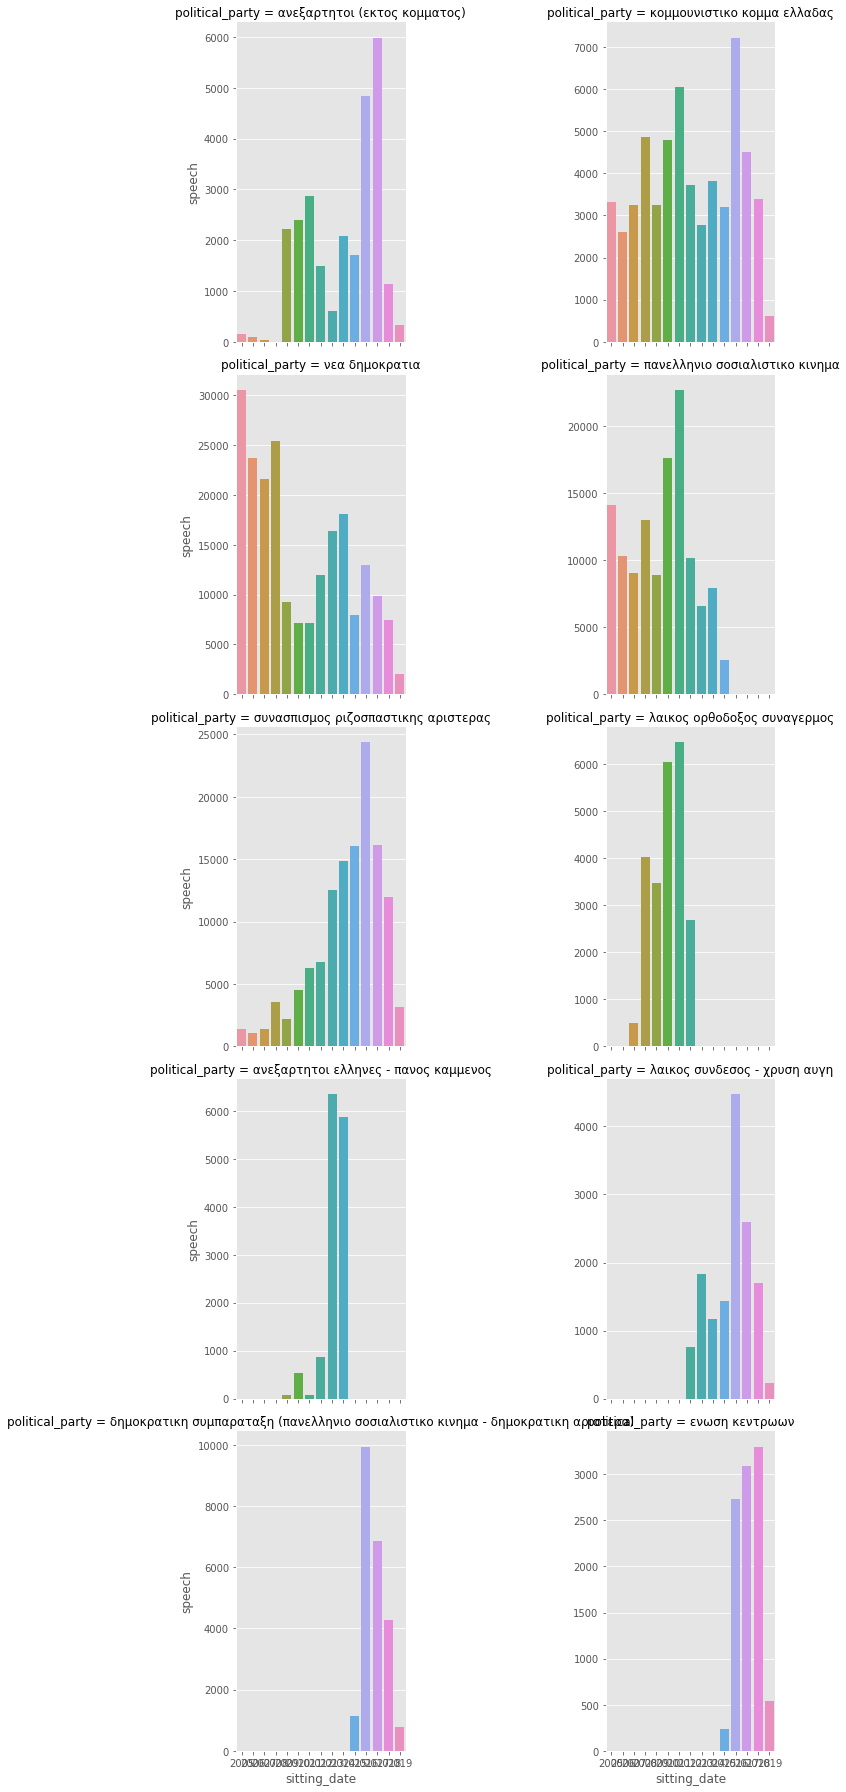

In [23]:
sb.factorplot(x='sitting_date', y='speech', 
               col='political_party', data=s_time_party, kind='bar', col_wrap=2,
              sharey=False)

### As you can see it is very difficult to have a clear image with so many parties, so lets see the results for the 3 most important parties

In [24]:
stp_3 = s_time_party.loc[(s_time_party['political_party'] == 'νεα δημοκρατια') | (s_time_party['political_party'] == 'πανελληνιο σοσιαλιστικο κινημα') | (s_time_party['political_party'] == 'συνασπισμος ριζοσπαστικης αριστερας')]
stp_3

,sitting_date,political_party,speech
2,2005,νεα δημοκρατια,30563
3,2005,πανελληνιο σοσιαλιστικο κινημα,14134
4,2005,συνασπισμος ριζοσπαστικης αριστερας,1426
7,2006,νεα δημοκρατια,23756
8,2006,πανελληνιο σοσιαλιστικο κινημα,10312
9,2006,συνασπισμος ριζοσπαστικης αριστερας,1059
13,2007,νεα δημοκρατια,21573
14,2007,πανελληνιο σοσιαλιστικο κινημα,9075
15,2007,συνασπισμος ριζοσπαστικης αριστερας,1404
18,2008,νεα δημοκρατια,25390


C:\Python\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Python\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


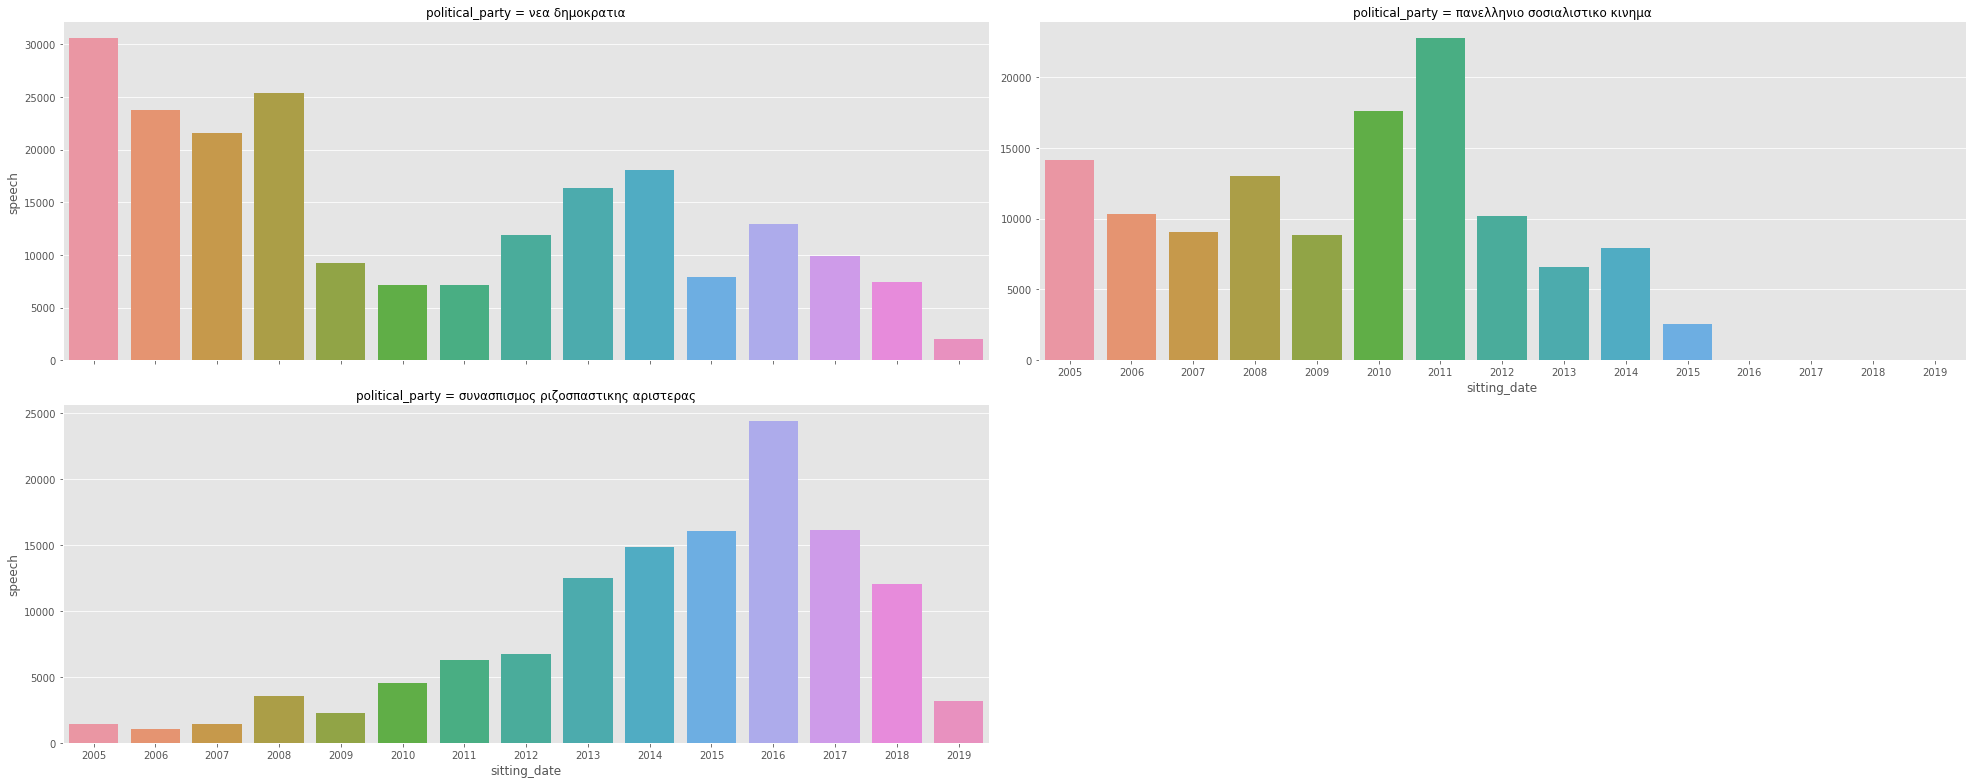

In [25]:
sb.factorplot(x='sitting_date', y='speech', 
               col='political_party', data=stp_3, kind='bar', col_wrap=2,size=5.5, aspect=2.5,
              sharey=False)

### As we can clearly see there is a sharp increase on the ammount of speeches in 2015-2016 for 'SYRIZA'. That's of course due to that in 2015 it became the goverment party for the first time, so it had the most speakers in the parliament. Very definite, is also the sharp decrease of the ammount of speeches for 'pasok' in the last four years, where it was no longer one of the parties in the parliament

## Classification without Neural Networks

### To start lets keep only the columns we need

In [12]:
greek_par=greek_par[['political_party','speech']]
greek_par

,political_party,speech
0,πανελληνιο σοσιαλιστικο κινημα,"Κυρίες και κύριοι συνάδελφοι, ένα γνωμικό ανα..."
1,νεα δημοκρατια,Θα πάρετε χρόνο δύο λεπτών από τη δευτερολογί...
2,πανελληνιο σοσιαλιστικο κινημα,"Μάλιστα, κύριε Πρόεδρε. Δεν θα παραλείψουμε ν..."
3,νεα δημοκρατια,"Για να μην υπάρχει διακοπή, όταν αγορεύετε γι..."
4,πανελληνιο σοσιαλιστικο κινημα,"Κύριε Πρόεδρε, κυρίες και κύριοι συνάδελφοι, ..."
...,...,...
647421,νεα δημοκρατια,Τα υπόλοιπα στη δευτερολογία σας.Κύριε Συντυχ...
647422,κομμουνιστικο κομμα ελλαδας,"Κύριε Πρόεδρε, οι καταστροφές προφανώς δεν ήτ..."
647423,νεα δημοκρατια,"Ορίστε, κύριε Υπουργέ, έχετε τον λόγο."
647424,νεα δημοκρατια,"Αρκεί και το κεντρικό κράτος, κύριε Υπουργέ, ..."


### Time for some preprocessing...

In [13]:
greek_par['speech'] = greek_par['speech'].apply(lambda x: x.lower())

In [14]:
greek_par['speech'] = greek_par['speech'].apply(lambda x: re.sub(r"[.,;:!(){}\'/""`<>*?~]","",x))

In [15]:
greek_par.head(10)

,political_party,speech
0,πανελληνιο σοσιαλιστικο κινημα,κυρίες και κύριοι συνάδελφοι ένα γνωμικό αναφ...
1,νεα δημοκρατια,θα πάρετε χρόνο δύο λεπτών από τη δευτερολογί...
2,πανελληνιο σοσιαλιστικο κινημα,μάλιστα κύριε πρόεδρε δεν θα παραλείψουμε να ...
3,νεα δημοκρατια,για να μην υπάρχει διακοπή όταν αγορεύετε για...
4,πανελληνιο σοσιαλιστικο κινημα,κύριε πρόεδρε κυρίες και κύριοι συνάδελφοι ο ...
5,νεα δημοκρατια,ευχαριστούμε τον κύριο τσοχατζόπουλο κύριε τσ...
6,πανελληνιο σοσιαλιστικο κινημα,ευχαριστώ κύριε πρόεδρε κυρία και κύριοι συνά...
7,νεα δημοκρατια,κύριε λωτίδη εξαντλήσατε και εσείς το χρόνο τ...
8,πανελληνιο σοσιαλιστικο κινημα,ευχαριστώ κύριε πρόεδρε κυρίες και κύριοι συν...
9,νεα δημοκρατια,ο κ τόγιας έχει το λόγο


### Due to even more excesive runtimes of the classifiers and grid seraches that follow, once again I have to narrow down my dataset even more, to a small part of the original one. Otherwise we are not going to have results at all

### So lets take a random sample of 100000 rows

In [15]:
train_dt_0 = greek_par.sample(n = 100000)

In [17]:
train_dt_0.head(10)

,political_party,speech
135385,νεα δημοκρατια,καμμία
459657,νεα δημοκρατια,τόσο χάλια ήταν
258898,πανελληνιο σοσιαλιστικο κινημα,το λόγο έχει ο βουλευτής του πασοκ ο κ ανδρέα...
509399,συνασπισμος ριζοσπαστικης αριστερας,δεκτό δεκτό
233139,πανελληνιο σοσιαλιστικο κινημα,το λόγο έχει ο εισηγητής της νέας δημοκρατίας...
367384,νεα δημοκρατια,ευχαριστούμε πολύτο λόγο έχει ο αντιλέγων κ κ...
361481,νεα δημοκρατια,είναι αντικατάσταση παραγράφου άρθρου που έχε...
476442,κομμουνιστικο κομμα ελλαδας,ευχαριστώ κύριε πρόεδρεκύριε υπουργέ βγάζετε ...
608492,συνασπισμος ριζοσπαστικης αριστερας,είμαστε σε ρυθμό αύξησης οι δεύτεροι μεταξύ τ...
35800,πανελληνιο σοσιαλιστικο κινημα,όχι κύριε πρόεδρε δεν θα κάνω χρήση του χρόνο...


### Let's see the potential support of our dataset

In [18]:
train_dt_0.groupby(by='political_party').count()

,speech
political_party,
ανεξαρτητοι (εκτος κομματος),4212
ανεξαρτητοι ελληνες - πανος καμμενος,2184
δημοκρατική συμπαράταξη,3704
ενωση κεντρωων,1581
κομμουνιστικο κομμα ελλαδας,9149
λαικος ορθοδοξος συναγερμος,3711
λαικος συνδεσος - χρυση αυγη,2278
νεα δημοκρατια,33569
πανελληνιο σοσιαλιστικο κινημα,19361


### Under these circumstances we could say it is satisfactorly balanced

In [19]:
parties = train_dt_0['political_party'].unique()
parties

array(['ανεξαρτητοι (εκτος κομματος)',
       'συνασπισμος ριζοσπαστικης αριστερας', 'νεα δημοκρατια',
       'ενωση κεντρωων', 'δημοκρατική συμπαράταξη',
       'πανελληνιο σοσιαλιστικο κινημα', 'κομμουνιστικο κομμα ελλαδας',
       'λαικος συνδεσος - χρυση αυγη', 'λαικος ορθοδοξος συναγερμος',
       'ανεξαρτητοι ελληνες - πανος καμμενος'], dtype=object)

### Due to sample's randomness I have to make sure that train dt and test dt, do not cross over

In [16]:
index_list = train_dt_0.index.to_list()

In [17]:
test_dt_0 = greek_par[~greek_par.index.isin(index_list)]

In [18]:
test_dt_0 = test_dt_0.sample(n = 50000)

### So time begin the natural language processing !!!

In [34]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.dummy import DummyClassifier
from sklearn import metrics
import nltk
from nltk.tokenize import word_tokenize
from sklearn.svm import LinearSVC

### In order to have a refernce point so I can evaluate my progress I will run DummyClassifier 

In [28]:
dummy_clf = DummyClassifier()
dummy_clf.fit(train_dt_0.speech,train_dt_0.political_party)

C:\Python\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier(constant=None, random_state=None, strategy='warn')

In [29]:
predicted = dummy_clf.predict(test_dt_0.speech)
np.mean(predicted == test_dt_0.political_party)

0.20204

In [30]:
print(metrics.classification_report(test_dt_0.political_party, predicted))

                                      precision    recall  f1-score   support

        ανεξαρτητοι (εκτος κομματος)       0.04      0.04      0.04      2210
ανεξαρτητοι ελληνες - πανος καμμενος       0.02      0.02      0.02      1049
             δημοκρατική συμπαράταξη       0.03      0.03      0.03      1859
                      ενωση κεντρωων       0.01      0.01      0.01       775
         κομμουνιστικο κομμα ελλαδας       0.09      0.09      0.09      4443
         λαικος ορθοδοξος συναγερμος       0.03      0.03      0.03      1827
        λαικος συνδεσος - χρυση αυγη       0.03      0.03      0.03      1151
                      νεα δημοκρατια       0.34      0.33      0.33     16861
      πανελληνιο σοσιαλιστικο κινημα       0.19      0.19      0.19      9859
 συνασπισμος ριζοσπαστικης αριστερας       0.19      0.20      0.19      9966

                            accuracy                           0.20     50000
                           macro avg       0.10      0.10     

### Let's try now MultinomialNB

In [23]:
vectorizer = TfidfVectorizer()

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', vectorizer),
                     ('clf', MultinomialNB()),
                    ])

In [44]:
text_clf.fit(train_dt_0.speech, train_dt_0.political_party)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [45]:
predicted = text_clf.predict(test_dt_0.speech) 
np.mean(predicted == test_dt_0.political_party)

0.36828

### So there is some improvement as you can see

### Now let's run some GridSearches, in order to find better parameters that suit our model

#### (As you will see both in this and the following tasks, I'm running gridsearches for a sample of the dataset, and then I'm doing the final validation for each classifier, neural network etc. with almost the hole dataset using the parameters I got from the gridsearches or others that I found in sklearn or tensorflow documentation. That's not 100% right because the outcome of the gridsearch may differ depending on the sample and the parameters mixture. Never the less I kind of have to do this this way because otherwise I have many resourses related problems such as: excesive runtimes, kernel dies, ram overload-mostly in colab- )

In [26]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__max_df': (0.5,0.75, 1.0),
 'vect__ngram_range': [(1, 1), (1, 2)],
 'vect__max_features': (5000, 10000),}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1, cv=5)

In [47]:
gs_clf = gs_clf.fit(train_dt_0.speech, train_dt_0.political_party)

C:\Python\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [48]:
gs_clf.best_params_

{'vect__max_df': 0.5, 'vect__max_features': 10000, 'vect__ngram_range': (1, 2)}

### After finding the comparatively better parameters let's see the improvement, adding also some greek stop words

In [29]:
stop_words = ["ο","η","το","οι","τα","του","της","των","τον","την","και","είμαι","είσαι","είναι","είμαστε","είστε","στο","στον","στη","στην","μα","άλλα","απο","για","προς","με","σε","ως","παρά","αντί","κατά","μετά","θα","να","δε","δεν","μη","μην","επί","ενώ","εάν","αν","τότε","που","πως","ποιος","ποιά","ποιό","ποιοί","ποιές","ποιών","ποιούς","αυτός","αυτή","αυτό","αυτοί","αυτών","αυτούς","αυτές","αυτά","εκείνος","εκείνη","εκείνο","εκείνοι","εκείνες","εκείνα","εκείνων","εκείνους","όπως","όμως","ίσως","όσο","ότι"]

In [30]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2),min_df=2,max_features=10000,max_df=0.5,stop_words=stop_words)

In [51]:
text_clf = Pipeline([('vect', vectorizer),
                     ('clf', MultinomialNB(alpha = 1.1e-05)),
                    ])
text_clf.fit(train_dt_0.speech, train_dt_0.political_party)
predicted = text_clf.predict(test_dt_0.speech) 
np.mean(predicted == test_dt_0.political_party)

0.40016

### To even more sure for our classifier, lets make a cross validation

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(text_clf,train_dt_0.speech,train_dt_0.political_party, cv=4, scoring='accuracy')
scores

array([0.36604, 0.36444, 0.36452, 0.36348])

### So scores are below 0.40, lets see how it is going on a significant sample this time

In [20]:
train_dt_1 = greek_par.sample(n = 500000)

In [21]:
train_dt_1.groupby(by='political_party').count()

,speech
political_party,
ανεξαρτητοι (εκτος κομματος),20692
ανεξαρτητοι ελληνες - πανος καμμενος,10996
δημοκρατική συμπαράταξη,18353
ενωση κεντρωων,7785
κομμουνιστικο κομμα ελλαδας,45643
λαικος ορθοδοξος συναγερμος,18594
λαικος συνδεσος - χρυση αυγη,11321
νεα δημοκρατια,168073
πανελληνιο σοσιαλιστικο κινημα,97764


In [22]:
index_list = train_dt_1.index.to_list()

In [23]:
test_dt_1 = greek_par[~greek_par.index.isin(index_list)]

In [64]:
text_clf.fit(train_dt_1.speech, train_dt_1.political_party)
predicted = text_clf.predict(test_dt_1.speech) 
np.mean(predicted == test_dt_1.political_party)

0.4020904670325375

In [65]:
print(metrics.classification_report(test_dt_1.political_party, predicted))

                                      precision    recall  f1-score   support

        ανεξαρτητοι (εκτος κομματος)       0.33      0.00      0.00      5220
ανεξαρτητοι ελληνες - πανος καμμενος       0.15      0.06      0.09      2840
             δημοκρατική συμπαράταξη       0.30      0.02      0.04      4739
                      ενωση κεντρωων       0.15      0.07      0.09      2049
         κομμουνιστικο κομμα ελλαδας       0.46      0.41      0.43     11619
         λαικος ορθοδοξος συναγερμος       0.80      0.06      0.11      4776
        λαικος συνδεσος - χρυση αυγη       0.72      0.14      0.24      2913
                      νεα δημοκρατια       0.41      0.76      0.54     42869
      πανελληνιο σοσιαλιστικο κινημα       0.35      0.30      0.33     25117
 συνασπισμος ριζοσπαστικης αριστερας       0.39      0.21      0.27     25772

                            accuracy                           0.40    127914
                           macro avg       0.41      0.20     

### And finally for this classifier, lets do a cross validation

In [66]:
scores = cross_val_score(text_clf,train_dt_1.speech,train_dt_1.political_party, cv=3, scoring='accuracy')
scores

array([0.40519719, 0.40328319, 0.40362761])

## Our next classifier will be Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [34]:
logreg = Pipeline([('vect', vectorizer),
                ('clf', LogisticRegression(C=1e5,n_jobs=-1))])

logreg.fit(train_dt_0.speech, train_dt_0.political_party)
predicted = logreg.predict(test_dt_0.speech) 
np.mean(predicted == test_dt_0.political_party)

0.44054

In [35]:
print(metrics.classification_report(test_dt_0.political_party, predicted))

                                      precision    recall  f1-score   support

        ανεξαρτητοι (εκτος κομματος)       0.24      0.15      0.19      2210
ανεξαρτητοι ελληνες - πανος καμμενος       0.27      0.06      0.09      1049
             δημοκρατική συμπαράταξη       0.27      0.12      0.17      1859
                      ενωση κεντρωων       0.22      0.04      0.07       775
         κομμουνιστικο κομμα ελλαδας       0.44      0.44      0.44      4443
         λαικος ορθοδοξος συναγερμος       0.39      0.12      0.18      1827
        λαικος συνδεσος - χρυση αυγη       0.29      0.43      0.35      1151
                      νεα δημοκρατια       0.50      0.65      0.57     16861
      πανελληνιο σοσιαλιστικο κινημα       0.42      0.39      0.40      9859
 συνασπισμος ριζοσπαστικης αριστερας       0.40      0.38      0.39      9966

                            accuracy                           0.44     50000
                           macro avg       0.35      0.28     

### Time for some Gridsearch too. In order to save time, I'm going to search only 'max_iter' parameter, having already define some parametres with values proven to be better for multiclass problems according to sklearn documentation. Also I'm keeping the best params of the vectorizer, as they are. 

In [25]:
new_reg = LogisticRegression(solver='newton-cg',penalty='l2',n_jobs=-1)

In [31]:
logreg = Pipeline([('vect', vectorizer),
                ('clf', new_reg)])

In [40]:
parameters = {'clf__max_iter':(100,1000,5000),}
gs_clf = GridSearchCV(logreg, parameters, n_jobs=-1, cv=3)

In [41]:
gs_clf = gs_clf.fit(train_dt_0.speech, train_dt_0.political_party)

In [42]:
gs_clf.best_params_

{'clf__max_iter': 100}

In [34]:
logreg.fit(train_dt_0.speech, train_dt_0.political_party)
predicted = logreg.predict(test_dt_0.speech) 
np.mean(predicted == test_dt_0.political_party)
print(metrics.classification_report(test_dt_0.political_party, predicted))

                                      precision    recall  f1-score   support

        ανεξαρτητοι (εκτος κομματος)       0.25      0.05      0.08      2101
ανεξαρτητοι ελληνες - πανος καμμενος       0.60      0.03      0.05      1079
             δημοκρατική συμπαράταξη       0.47      0.04      0.08      1811
                      ενωση κεντρωων       0.67      0.01      0.02       780
         κομμουνιστικο κομμα ελλαδας       0.47      0.44      0.45      4570
         λαικος ορθοδοξος συναγερμος       0.80      0.07      0.14      1858
        λαικος συνδεσος - χρυση αυγη       0.40      0.28      0.33      1102
                      νεα δημοκρατια       0.48      0.74      0.58     16891
      πανελληνιο σοσιαλιστικο κινημα       0.43      0.35      0.39      9883
 συνασπισμος ριζοσπαστικης αριστερας       0.41      0.40      0.40      9925

                            accuracy                           0.45     50000
                           macro avg       0.50      0.24     

### Let's try the classifier now with the parameter class_weights and with a deferend solver afterwards

In [31]:
new_reg = LogisticRegression(solver='newton-cg',penalty='l2',n_jobs=-1,class_weight='balanced')

In [32]:
logreg = Pipeline([('vect', vectorizer),
                ('clf', new_reg)])

In [33]:
logreg.fit(train_dt_0.speech, train_dt_0.political_party)
predicted = logreg.predict(test_dt_0.speech) 
np.mean(predicted == test_dt_0.political_party)

0.32502

In [34]:
print(metrics.classification_report(test_dt_0.political_party, predicted))

                                      precision    recall  f1-score   support

        ανεξαρτητοι (εκτος κομματος)       0.09      0.13      0.10      2116
ανεξαρτητοι ελληνες - πανος καμμενος       0.09      0.36      0.14      1078
             δημοκρατική συμπαράταξη       0.13      0.30      0.18      1891
                      ενωση κεντρωων       0.12      0.56      0.20       792
         κομμουνιστικο κομμα ελλαδας       0.42      0.50      0.46      4489
         λαικος ορθοδοξος συναγερμος       0.17      0.37      0.23      1821
        λαικος συνδεσος - χρυση αυγη       0.20      0.45      0.28      1114
                      νεα δημοκρατια       0.62      0.30      0.41     16711
      πανελληνιο σοσιαλιστικο κινημα       0.42      0.35      0.38      9893
 συνασπισμος ριζοσπαστικης αριστερας       0.42      0.26      0.32     10095

                            accuracy                           0.33     50000
                           macro avg       0.27      0.36     

### As you can see by using 'balanced' in class_weight parameter I increase significantly the recall but at the same time, precision drops as much. As a result our overall acuraccy is smaller

In [27]:
new_reg1 = LogisticRegression(solver='liblinear',penalty='l1',n_jobs=-1)

In [28]:
logreg1 = Pipeline([('vect', vectorizer),
                ('clf', new_reg1)])

In [29]:
logreg1.fit(train_dt_0.speech, train_dt_0.political_party)
predicted = logreg1.predict(test_dt_0.speech) 
np.mean(predicted == test_dt_0.political_party)

C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


0.4486

In [30]:
print(metrics.classification_report(test_dt_0.political_party, predicted))

                                      precision    recall  f1-score   support

        ανεξαρτητοι (εκτος κομματος)       0.24      0.04      0.07      2116
ανεξαρτητοι ελληνες - πανος καμμενος       0.34      0.01      0.03      1078
             δημοκρατική συμπαράταξη       0.42      0.03      0.06      1891
                      ενωση κεντρωων       0.54      0.03      0.05       792
         κομμουνιστικο κομμα ελλαδας       0.47      0.47      0.47      4489
         λαικος ορθοδοξος συναγερμος       0.67      0.12      0.20      1821
        λαικος συνδεσος - χρυση αυγη       0.43      0.32      0.37      1114
                      νεα δημοκρατια       0.46      0.77      0.58     16711
      πανελληνιο σοσιαλιστικο κινημα       0.44      0.33      0.38      9893
 συνασπισμος ριζοσπαστικης αριστερας       0.40      0.35      0.37     10095

                            accuracy                           0.45     50000
                           macro avg       0.44      0.25     

### So with the liblinear solver we also have satisfactory results but as the sklearn documantation says, it is not recommented for large data sets. That's why I'm using this classifier with the 'newton-cg' solver for the next task 

### Let's see how our second classifier is going with all the speeches of the last 15 years

In [35]:
logreg.fit(train_dt_1.speech, train_dt_1.political_party)
predicted = logreg.predict(test_dt_1.speech) 
np.mean(predicted == test_dt_1.political_party)

0.4874446894006911

In [36]:
print(metrics.classification_report(test_dt_1.political_party, predicted))

                                      precision    recall  f1-score   support

        ανεξαρτητοι (εκτος κομματος)       0.31      0.07      0.11      5331
ανεξαρτητοι ελληνες - πανος καμμενος       0.56      0.06      0.10      2747
             δημοκρατική συμπαράταξη       0.59      0.10      0.17      4711
                      ενωση κεντρωων       0.72      0.06      0.11      1987
         κομμουνιστικο κομμα ελλαδας       0.47      0.49      0.48     11695
         λαικος ορθοδοξος συναγερμος       0.73      0.16      0.26      4696
        λαικος συνδεσος - χρυση αυγη       0.44      0.33      0.38      2941
                      νεα δημοκρατια       0.51      0.74      0.61     43300
      πανελληνιο σοσιαλιστικο κινημα       0.47      0.42      0.45     24933
 συνασπισμος ριζοσπαστικης αριστερας       0.44      0.45      0.44     25573

                            accuracy                           0.49    127914
                           macro avg       0.53      0.29     

### With accuracy close to 0.50 and recall close to 0.30, these are the best scores so far

### And for the last classifier we have Linear Support Vector Classification. So let's try it in the default version (Except from max_iter that I reduced in order to reduce runtime)

In [37]:
lsvc = Pipeline([('vect', vectorizer),
                ('clf', LinearSVC(max_iter = 200))])

lsvc.fit(train_dt_0.speech, train_dt_0.political_party)
predicted = lsvc.predict(test_dt_0.speech) 
np.mean(predicted == test_dt_0.political_party)

0.4402

In [38]:
print(metrics.classification_report(test_dt_0.political_party, predicted))

                                      precision    recall  f1-score   support

        ανεξαρτητοι (εκτος κομματος)       0.20      0.02      0.03      2042
ανεξαρτητοι ελληνες - πανος καμμενος       0.30      0.03      0.05      1075
             δημοκρατική συμπαράταξη       0.36      0.06      0.10      1780
                      ενωση κεντρωων       0.48      0.05      0.09       786
         κομμουνιστικο κομμα ελλαδας       0.45      0.50      0.47      4636
         λαικος ορθοδοξος συναγερμος       0.50      0.14      0.22      1866
        λαικος συνδεσος - χρυση αυγη       0.38      0.33      0.36      1141
                      νεα δημοκρατια       0.47      0.69      0.56     16667
      πανελληνιο σοσιαλιστικο κινημα       0.41      0.35      0.38      9793
 συνασπισμος ριζοσπαστικης αριστερας       0.39      0.38      0.38     10214

                            accuracy                           0.44     50000
                           macro avg       0.39      0.25     

### And now some parameter tuning with gridsearch

In [48]:
parameters = {'clf__max_iter':(100,500), 'clf__dual':(True,False)}
gs_clf = GridSearchCV(lsvc, parameters, n_jobs=-1, cv=3)

In [49]:
gs_clf = gs_clf.fit(train_dt_0.speech, train_dt_0.political_party)

C:\Python\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [50]:
gs_clf.best_params_

{'clf__dual': False, 'clf__max_iter': 100}

### Let's see how stop words affect this classifier

In [51]:
lsvc = Pipeline([('vect', vectorizer),
                ('clf', LinearSVC(max_iter = 100, dual = False,tol=1e-5))])

In [52]:
parameters = {'vect__stop_words':(stop_words, None)}
gs_clf = GridSearchCV(lsvc, parameters, n_jobs=-1, cv=3)

In [53]:
gs_clf = gs_clf.fit(train_dt_0.speech, train_dt_0.political_party)

C:\Python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [54]:
gs_clf.best_params_

{'vect__stop_words': None}

### Surprisingly it's better without them. So here the improvement I've made so far for this classifier

In [55]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2),min_df=2,max_features=10000,max_df=0.5)

In [62]:
lsvc = Pipeline([('vect', vectorizer),
                ('clf', LinearSVC(max_iter = 200, dual = False,tol=1e-5))])

In [63]:
lsvc.fit(train_dt_0.speech, train_dt_0.political_party)
predicted = lsvc.predict(test_dt_0.speech) 
np.mean(predicted == test_dt_0.political_party)

C:\Python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.44354

In [64]:
print(metrics.classification_report(test_dt_0.political_party, predicted))

                                      precision    recall  f1-score   support

        ανεξαρτητοι (εκτος κομματος)       0.25      0.02      0.03      2042
ανεξαρτητοι ελληνες - πανος καμμενος       0.35      0.02      0.05      1075
             δημοκρατική συμπαράταξη       0.44      0.06      0.11      1780
                      ενωση κεντρωων       0.48      0.04      0.08       786
         κομμουνιστικο κομμα ελλαδας       0.45      0.50      0.47      4636
         λαικος ορθοδοξος συναγερμος       0.53      0.15      0.23      1866
        λαικος συνδεσος - χρυση αυγη       0.39      0.32      0.35      1141
                      νεα δημοκρατια       0.48      0.68      0.56     16667
      πανελληνιο σοσιαλιστικο κινημα       0.41      0.36      0.39      9793
 συνασπισμος ριζοσπαστικης αριστερας       0.39      0.41      0.40     10214

                            accuracy                           0.44     50000
                           macro avg       0.42      0.26     

### Finally for this classifier and the non-neural network session of this project, we have the performance of Linear Support Vector Classification with the biggest sample 

In [65]:
lsvc.fit(train_dt_1.speech, train_dt_1.political_party)
predicted = lsvc.predict(test_dt_1.speech) 
np.mean(predicted == test_dt_1.political_party)
print(metrics.classification_report(test_dt_1.political_party, predicted))

C:\Python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                                      precision    recall  f1-score   support

        ανεξαρτητοι (εκτος κομματος)       0.42      0.01      0.01      5268
ανεξαρτητοι ελληνες - πανος καμμενος       0.52      0.01      0.02      2789
             δημοκρατική συμπαράταξη       0.54      0.08      0.13      4638
                      ενωση κεντρωων       0.68      0.07      0.13      2103
         κομμουνιστικο κομμα ελλαδας       0.47      0.49      0.48     11705
         λαικος ορθοδοξος συναγερμος       0.71      0.16      0.26      4603
        λαικος συνδεσος - χρυση αυγη       0.42      0.36      0.39      2851
                      νεα δημοκρατια       0.49      0.73      0.59     43286
      πανελληνιο σοσιαλιστικο κινημα       0.45      0.38      0.41     25189
 συνασπισμος ριζοσπαστικης αριστερας       0.41      0.42      0.42     25482

                            accuracy                           0.47    127914
                           macro avg       0.51      0.27     

### So the best classifier remains Logistic Regression with the LSVC slightly inferior

## Classifiacation with neural networks

In [25]:
import io
import os
import re
import shutil
import string
import tensorflow as tf

from datetime import datetime
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D, SpatialDropout1D, LSTM, Dropout, BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.optimizers import SGD, Adagrad
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.metrics
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier

### So first of all lets make a validation and a test dataset

In [47]:
speeches = train_dt_0['speech'].values

In [48]:
labels = train_dt_0['political_party'].values

In [49]:
speeches_train, speeches_test, labels_train, labels_test = train_test_split(speeches,labels,test_size=0.2,random_state = 100)

In [50]:
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size) #quite plane tokenizer because the preprossesing has already been done
tokenizer.fit_on_texts(speeches_train)

In [51]:
in_train  = tokenizer.texts_to_sequences(speeches_train)
in_test = tokenizer.texts_to_sequences(speeches_test)

In [52]:
vocab_size = len(tokenizer.word_index) + 1
sequence_length = 200

in_train = pad_sequences(in_train, padding='post', maxlen=sequence_length)
in_test = pad_sequences(in_test, padding='post', maxlen=sequence_length)

In [53]:
encoder = OneHotEncoder()
labels_train = labels_train.reshape(-1,1)
labels_test = labels_test.reshape(-1,1)

out_train = encoder.fit_transform(labels_train).toarray()
out_test = encoder.fit_transform(labels_test).toarray()

### Time for our first model

In [33]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=sequence_length))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          22228400  
_________________________________________________________________
conv1d (Conv1D)              (None, 196, 64)           32064     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 22,261,114
Trainable params: 22,261,114
Non-trainable params: 0
_________________________________________________________________


In [34]:
batch_size = 64

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

history = model.fit(in_train, out_train,
                    epochs=5,
                    validation_data=(in_test, out_test),
                    callbacks=[callback],
                    batch_size=batch_size)

Epoch 1/5
1250/1250 [==============================] - 245s 196ms/step - loss: 1.7825 - accuracy: 0.3577 - val_loss: 1.6020 - val_accuracy: 0.4103
Epoch 2/5
1250/1250 [==============================] - 245s 196ms/step - loss: 1.5124 - accuracy: 0.4624 - val_loss: 1.5686 - val_accuracy: 0.4192
Epoch 3/5
1250/1250 [==============================] - 244s 195ms/step - loss: 1.3369 - accuracy: 0.5386 - val_loss: 1.5947 - val_accuracy: 0.4257
Epoch 4/5
1250/1250 [==============================] - 243s 195ms/step - loss: 1.1462 - accuracy: 0.6115 - val_loss: 1.6591 - val_accuracy: 0.4185
Epoch 5/5
1250/1250 [==============================] - 245s 196ms/step - loss: 0.9787 - accuracy: 0.6774 - val_loss: 1.7619 - val_accuracy: 0.4018


In [ ]:
loss, accuracy = model.evaluate(in_test,out_test)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

625/625 [==============================] - 2s 3ms/step - loss: 1.7619 - accuracy: 0.4018
Loss:  1.761902093887329
Accuracy:  0.4018000066280365


In [ ]:
parties_pred = model.predict(in_test)
parties_pred = parties_pred
right_parties = out_test

cm = confusion_matrix(out_test.argmax(axis=1),parties_pred.argmax(axis=1))

def precision(labels, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(labels, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

    print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")
print("precision total:", precision_macro_average(cm))

print("recall total:", recall_macro_average(cm))    

    0     0.245  0.028
    1     0.257  0.078
    2     0.224  0.138
    3     0.611  0.036
    4     0.417  0.455
    5     0.243  0.136
    6     0.374  0.318
    7     0.495  0.548
    8     0.338  0.380
    9     0.346  0.404
precision total: 0.3464994775339603
recall total: 0.40360272638753647


In [60]:
pre = 0.3465
rec = 0.4036

F1 = 2 * (pre * rec) / (pre + rec)
print(F1)

0.37287668310891875


### Gridsearch (in order to do it we must make it a method)

In [ ]:
 def create_model(num_filters, kernel_size, vocab_size, embedding_dim, sequence_length):
  model = Sequential()
  model.add(layers.Embedding(input_dim=vocab_size, 
                            output_dim=embedding_dim, 
                            input_length=sequence_length))
  model.add(layers.Conv1D(64, 5, activation='relu'))
  model.add(layers.GlobalMaxPooling1D())
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
model1 = KerasClassifier(build_fn=create_model,
                            epochs=5, batch_size=64,
                            verbose=1)

In [ ]:
param_grid = dict(num_filters=[32, 64, 128],
                      kernel_size=[3,5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[embedding_dim],
                      sequence_length=[sequence_length])

In [ ]:
grid = RandomizedSearchCV(estimator=model1, param_distributions=param_grid,
                              cv=2, verbose=1, n_iter=5)


grid_result = grid.fit(in_train, out_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/5
625/625 [==============================] - 128s 202ms/step - loss: 1.8485 - accuracy: 0.3415
Epoch 2/5
625/625 [==============================] - 127s 204ms/step - loss: 1.5995 - accuracy: 0.4261
Epoch 3/5
625/625 [==============================] - 127s 203ms/step - loss: 1.3999 - accuracy: 0.5207
Epoch 4/5
625/625 [==============================] - 126s 201ms/step - loss: 1.1888 - accuracy: 0.6100
Epoch 5/5
625/625 [==============================] - 2s 3ms/step - loss: 1.7925 - accuracy: 0.3972
Epoch 1/5
625/625 [==============================] - 127s 203ms/step - loss: 1.8422 - accuracy: 0.3454
Epoch 2/5
625/625 [==============================] - 126s 202ms/step - loss: 1.5833 - accuracy: 0.4383
Epoch 3/5
625/625 [==============================] - 126s 201ms/step - loss: 1.3982 - accuracy: 0.5276
Epoch 4/5
625/625 [==============================] - 126s 201ms/step - loss: 1.2080 - accuracy: 0.6024
Epoch 5/5
625/625 [==============================] - 2s 3ms/step - loss: 1.79

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 105.2min finished


Epoch 1/5
1250/1250 [==============================] - 248s 198ms/step - loss: 1.7917 - accuracy: 0.3532
Epoch 2/5
1250/1250 [==============================] - 249s 199ms/step - loss: 1.5212 - accuracy: 0.4544
Epoch 3/5
1250/1250 [==============================] - 248s 198ms/step - loss: 1.3451 - accuracy: 0.5323
Epoch 4/5
1250/1250 [==============================] - 247s 198ms/step - loss: 1.1648 - accuracy: 0.6048
Epoch 5/5
1250/1250 [==============================] - 247s 198ms/step - loss: 0.9902 - accuracy: 0.6707


In [ ]:
grid_result.best_params_

{'embedding_dim': 100,
 'kernel_size': 5,
 'num_filters': 128,
 'sequence_length': 200,
 'vocab_size': 221610}

### So here we have the best params from our gridsearch. As you can see there is a bid difference between train accuracy and validation accuracy (propably due to overfit), so I'm going to fix this malfunction and then I'm going to excecute the model with the best parameters and a bigger dataset, in order to have more represenative metrics scores

### First, in order to reduce overfitting I will try a much bigger dataset in training and then some mix up augmentation

In [32]:
try:
  import textaugment
except ModuleNotFoundError:
  !pip install textaugment
  import textaugment
from textaugment import MIXUP

     |████████████████████████████████| 61kB 10.0MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 1.0MB 43.7MB/s 
     |████████████████████████████████| 61kB 11.0MB/s 
     |████████████████████████████████| 71kB 12.6MB/s 
     |████████████████████████████████| 102kB 15.2MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=95486411d97bd5d14412fd553b1575662c33ada00fadc6aa7b5df39e74561e83
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=7e6b6205d52ace8220b0c712e25b7f119ca698d85e637a4a4dd45eb830305dee
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [40]:
speeches1 = train_dt_1['speech'].values

In [41]:
labels1 = train_dt_1['political_party'].values

In [42]:
speeches_train1, speeches_test1, labels_train1, labels_test1 = train_test_split(speeches1,labels1,test_size=0.2,random_state = 100)

In [43]:
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size) #quite plane tokenizer because the preprossesing has already been done
tokenizer.fit_on_texts(speeches_train1)

In [44]:
in_train1  = tokenizer.texts_to_sequences(speeches_train1)
in_test1 = tokenizer.texts_to_sequences(speeches_test1)

In [45]:
vocab_size = len(tokenizer.word_index) + 1
sequence_length = 200

in_train1 = pad_sequences(in_train1, padding='post', maxlen=sequence_length)
in_test1 = pad_sequences(in_test1, padding='post', maxlen=sequence_length)

In [46]:
in_train1.shape

(400000, 200)

In [47]:
vocab_size

546911

In [48]:
encoder = OneHotEncoder()
labels_train1 = labels_train1.reshape(-1,1)
labels_test1 = labels_test1.reshape(-1,1)

out_train1 = encoder.fit_transform(labels_train1).toarray()
out_test1 = encoder.fit_transform(labels_test1).toarray()

In [49]:
out_train1.shape

(400000, 10)

#### Initialize mix up

In [ ]:
mixup = MIXUP()
generator, step = mixup.flow(in_train1, out_train1, batch_size=batch_size, runs=1)

### Finally I'm adding a Droupout layer in order to add some regularization 

In [34]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=sequence_length))
model.add(Dropout(0.3))
model.add(layers.Conv1D(128, 5, activation='relu')) # also adding the new parameters from gridsearch
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          21830500  
_________________________________________________________________
dropout (Dropout)            (None, 200, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 196, 128)          64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 21,895,918
Trainable params: 21,895,918
Non-trainable params: 0
_________________________________________________________________


#### So time to see how our model is doing with the new modifications

In [ ]:
history = model.fit(generator, steps_per_epoch=step,
          epochs=10,
          validation_data=(in_test1, out_test1))

### Unfortunatelly, the comand above never manage to get executed. Excecution had to stop in every try due to ram overload (tried in colab). So unfortunately we have to continue with the sample of the data

In [33]:
mixup = MIXUP()
generator, step = mixup.flow(in_train, out_train, batch_size=batch_size, runs=1)

In [53]:
history = model.fit(generator, steps_per_epoch=step,
          epochs=10,
          validation_data=(in_test, out_test))

Epoch 1/10
1250/1250 [==============================] - 624s 493ms/step - loss: 1.8459 - accuracy: 0.3320 - val_loss: 1.7625 - val_accuracy: 0.3625
Epoch 2/10
1250/1250 [==============================] - 611s 489ms/step - loss: 1.7926 - accuracy: 0.3472 - val_loss: 1.7465 - val_accuracy: 0.3698
Epoch 3/10
1250/1250 [==============================] - 612s 490ms/step - loss: 1.7781 - accuracy: 0.3525 - val_loss: 1.7223 - val_accuracy: 0.3748
Epoch 4/10
1250/1250 [==============================] - 612s 489ms/step - loss: 1.7780 - accuracy: 0.3486 - val_loss: 1.7099 - val_accuracy: 0.3744
Epoch 5/10
1250/1250 [==============================] - 611s 489ms/step - loss: 1.7722 - accuracy: 0.3498 - val_loss: 1.7026 - val_accuracy: 0.3704
Epoch 6/10
1250/1250 [==============================] - 611s 489ms/step - loss: 1.7653 - accuracy: 0.3555 - val_loss: 1.6919 - val_accuracy: 0.3795
Epoch 7/10
1250/1250 [==============================] - 611s 489ms/step - loss: 1.7682 - accuracy: 0.3535 - val_

In [54]:
parties_pred = model.predict(in_test)
parties_pred = parties_pred
right_parties = out_test

cm = confusion_matrix(out_test.argmax(axis=1),parties_pred.argmax(axis=1))

    print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")
print("precision total:", precision_macro_average(cm))

print("recall total:", recall_macro_average(cm))    

    0     0.667  0.007
    1     0.316  0.014
    2     0.667  0.008
    3     0.400  0.006
    4     0.410  0.299
    5     0.677  0.028
    6     0.342  0.211
    7     0.409  0.721
    8     0.305  0.304
    9     0.318  0.197
precision total: 0.3178262659530672
recall total: 0.19658772599949073


### As it seems I've reach the point of underfit this time. So I'm going to increase the number of epochs and also add a ButchNormalization after the activation function in case the 20 epochs proven too many

In [35]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=sequence_length))
model.add(Dropout(0.3))
model.add(layers.Conv1D(128, 5, activation='relu')) # also adding the new parameters from gridsearch
model.add(BatchNormalization())
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 100)          21830500  
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 100)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 196, 128)          64128     
_________________________________________________________________
batch_normalization (BatchNo (None, 196, 128)          512       
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 21,896,430
Trainable params: 21,896,174
Non-trainable params: 256
________________________________________

In [36]:
history = model.fit(generator, steps_per_epoch=step,
          epochs=20,
          validation_data=(in_test, out_test))

Epoch 1/20
1250/1250 [==============================] - 260s 202ms/step - loss: 1.9386 - accuracy: 0.3019 - val_loss: 1.8112 - val_accuracy: 0.3543
Epoch 2/20
1250/1250 [==============================] - 249s 199ms/step - loss: 1.8162 - accuracy: 0.3380 - val_loss: 1.7736 - val_accuracy: 0.3595
Epoch 3/20
1250/1250 [==============================] - 247s 198ms/step - loss: 1.8004 - accuracy: 0.3428 - val_loss: 1.7684 - val_accuracy: 0.3677
Epoch 4/20
1250/1250 [==============================] - 246s 197ms/step - loss: 1.7914 - accuracy: 0.3457 - val_loss: 1.7626 - val_accuracy: 0.3423
Epoch 5/20
1250/1250 [==============================] - 246s 197ms/step - loss: 1.7834 - accuracy: 0.3475 - val_loss: 1.7510 - val_accuracy: 0.3618
Epoch 6/20
1250/1250 [==============================] - 248s 198ms/step - loss: 1.7795 - accuracy: 0.3495 - val_loss: 1.7584 - val_accuracy: 0.3564
Epoch 7/20
1250/1250 [==============================] - 248s 198ms/step - loss: 1.7764 - accuracy: 0.3535 - val_

In [37]:
parties_pred = model.predict(in_test)
parties_pred = parties_pred
right_parties = out_test

cm = confusion_matrix(out_test.argmax(axis=1),parties_pred.argmax(axis=1))

    print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")
print("precision total:", precision_macro_average(cm))

print("recall total:", recall_macro_average(cm))    

    0     0.225  0.166
    1     0.000  0.000
    2       nan  0.000
    3       nan  0.000
    4     0.384  0.295
    5     0.778  0.019
    6     0.360  0.207
    7     0.401  0.808
    8     0.355  0.099
    9     0.335  0.249
precision total: 0.33524645509790674
recall total: 0.2491844416562108


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


#### As you can see the results are pretty much the same, that make sense accualy if you consider that batch normalization and dropout layers, both reduce over fit and the number of 20 epochs was not that high in order to justify the use of them simultaneously. So for the last try I will only use batch_normalization layer with 15 epochs

In [35]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=sequence_length))
model.add(layers.Conv1D(128, 5, activation='relu')) # also adding the new parameters from gridsearch
model.add(BatchNormalization())
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          22228400  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 196, 128)          64128     
_________________________________________________________________
batch_normalization (BatchNo (None, 196, 128)          512       
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 22,294,330
Trainable params: 22,294,074
Non-trainable params: 256
_________________________________________________________________


In [39]:
history = model.fit(generator, steps_per_epoch=step,
          epochs=15,
          validation_data=(in_test, out_test))

Epoch 1/15
1250/1250 [==============================] - 247s 197ms/step - loss: 1.9005 - accuracy: 0.3094 - val_loss: 1.7726 - val_accuracy: 0.3502
Epoch 2/15
1250/1250 [==============================] - 241s 193ms/step - loss: 1.8119 - accuracy: 0.3391 - val_loss: 1.7478 - val_accuracy: 0.3605
Epoch 3/15
1250/1250 [==============================] - 245s 196ms/step - loss: 1.7874 - accuracy: 0.3447 - val_loss: 1.7276 - val_accuracy: 0.3632
Epoch 4/15
1250/1250 [==============================] - 246s 197ms/step - loss: 1.7767 - accuracy: 0.3491 - val_loss: 1.7115 - val_accuracy: 0.3708
Epoch 5/15
1250/1250 [==============================] - 243s 194ms/step - loss: 1.7688 - accuracy: 0.3520 - val_loss: 1.7031 - val_accuracy: 0.3690
Epoch 6/15
1250/1250 [==============================] - 246s 197ms/step - loss: 1.7641 - accuracy: 0.3513 - val_loss: 1.6988 - val_accuracy: 0.3724
Epoch 7/15
1250/1250 [==============================] - 243s 194ms/step - loss: 1.7572 - accuracy: 0.3580 - val_

In [41]:
parties_pred = model.predict(in_test)
parties_pred = parties_pred
right_parties = out_test

cm = confusion_matrix(out_test.argmax(axis=1),parties_pred.argmax(axis=1))

    print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")
print("precision total:", precision_macro_average(cm))

print("recall total:", recall_macro_average(cm))    

    0     0.239  0.180
    1     0.000  0.000
    2     0.100  0.001
    3       nan  0.000
    4     0.380  0.317
    5     0.769  0.027
    6     0.404  0.251
    7     0.409  0.741
    8     0.318  0.241
    9     0.347  0.197
precision total: 0.3468488320846187
recall total: 0.19749058971141784


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


### Let's try the last model without mix up in case it is this that makes results worse

In [36]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

history = model.fit(in_train, out_train,
                    epochs=15,
                    validation_data=(in_test, out_test),
                    callbacks=[callback],
                    batch_size=batch_size)

Epoch 1/15
1250/1250 [==============================] - 264s 205ms/step - loss: 1.7696 - accuracy: 0.3563 - val_loss: 1.6183 - val_accuracy: 0.4076
Epoch 2/15
1250/1250 [==============================] - 256s 205ms/step - loss: 1.3580 - accuracy: 0.5167 - val_loss: 1.6788 - val_accuracy: 0.4032
Epoch 3/15
1250/1250 [==============================] - 254s 203ms/step - loss: 1.0929 - accuracy: 0.6184 - val_loss: 1.8001 - val_accuracy: 0.3828
Epoch 4/15
1250/1250 [==============================] - 252s 202ms/step - loss: 0.8938 - accuracy: 0.6888 - val_loss: 2.0242 - val_accuracy: 0.3819


In [37]:
parties_pred = model.predict(in_test)
parties_pred = parties_pred
right_parties = out_test

cm = confusion_matrix(out_test.argmax(axis=1),parties_pred.argmax(axis=1))

def precision(labels, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(labels, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

    print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")
print("precision total:", precision_macro_average(cm))

print("recall total:", recall_macro_average(cm))   



    0     0.212  0.043
    1     0.241  0.114
    2     0.320  0.057
    3     0.145  0.068
    4     0.344  0.450
    5     0.180  0.116
    6     0.377  0.300
    7     0.479  0.558
    8     0.383  0.208
    9     0.306  0.470
precision total: 0.30566768932665905
recall total: 0.4703105590062112


In [59]:
pre = 0.3056
rec = 0.4703

F1 = 2 * (pre * rec) / (pre + rec)
print(F1)

0.3704695965974996


### Finaly lets try a LSTM

In [55]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=sequence_length))
model.add(SpatialDropout1D(0.2))
model.add(BatchNormalization())
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(in_train, out_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.005)])

Epoch 1/10
1125/1125 [==============================] - 502s 445ms/step - loss: 1.8671 - accuracy: 0.3228 - val_loss: 1.8172 - val_accuracy: 0.3524
Epoch 2/10
1125/1125 [==============================] - 494s 439ms/step - loss: 1.7954 - accuracy: 0.3575 - val_loss: 1.7709 - val_accuracy: 0.3605
Epoch 3/10
1125/1125 [==============================] - 492s 438ms/step - loss: 1.6795 - accuracy: 0.4012 - val_loss: 1.7108 - val_accuracy: 0.3859
Epoch 4/10
1125/1125 [==============================] - 491s 436ms/step - loss: 1.5637 - accuracy: 0.4428 - val_loss: 1.6929 - val_accuracy: 0.4029
Epoch 5/10
1125/1125 [==============================] - 492s 437ms/step - loss: 1.4938 - accuracy: 0.4624 - val_loss: 1.7186 - val_accuracy: 0.4024
Epoch 6/10
1125/1125 [==============================] - 491s 437ms/step - loss: 1.4459 - accuracy: 0.4802 - val_loss: 1.7366 - val_accuracy: 0.4039
Epoch 7/10
1125/1125 [==============================] - 490s 436ms/step - loss: 1.3946 - accuracy: 0.5023 - val_

In [56]:
parties_pred = model.predict(in_test)
parties_pred = parties_pred
right_parties = out_test

cm = confusion_matrix(out_test.argmax(axis=1),parties_pred.argmax(axis=1))

print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")
print("precision total:", precision_macro_average(cm))

print("recall total:", recall_macro_average(cm))    

label precision recall
    0     0.191  0.170
    1     0.000  0.000
    2     0.051  0.004
    3     0.333  0.014
    4     0.412  0.442
    5     0.179  0.031
    6     0.384  0.326
    7     0.447  0.693
    8     0.358  0.191
    9     0.343  0.350
precision total: 0.34269662921348315
recall total: 0.35031210986267164


In [58]:
pre = 0.3427
rec = 0.3503

F1 = 2 * (pre * rec) / (pre + rec)
print(F1)

0.3464583261183261


## So, in coclusion, after all this work, the best model was the first one. It does overfit a bit, as others, but it has the best F1 score in the validation. Well, some times, the simplest answer is the best answer